In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt


# Define os nomes das colunas e as larguras de cada campo
colspecs = [(2, 10), (10, 22), (56, 69), (82, 95)]
names = ['Data', 'Codigo', 'Preco_Abertura', 'Preco_Fechamento']

# Carrega o arquivo
df_2022 = pd.read_fwf('COTAHIST_A2022.TXT', colspecs=colspecs, names=names, header=None)
df_2023 = pd.read_fwf('COTAHIST_A2023.TXT', colspecs=colspecs, names=names, header=None)

# Filtra pela ação VALE3, garantindo que seja exatamente VALE3 (sem caracteres adicionais)
vale3_df_2022 = df_2022[df_2022['Codigo'].str.endswith('VALE3')]
vale3_df_2023 = df_2023[df_2023['Codigo'].str.endswith('VALE3')]

print(vale3_df_2022)
print(vale3_df_2023)

# Supondo que 'df' seja o seu DataFrame e 'Data' a coluna com as datas

# Convertendo a coluna 'Data' para datetime
vale3_df_2022['Data'] = pd.to_datetime(vale3_df_2022['Data'], format='%Y%m%d')
vale3_df_2023['Data'] = pd.to_datetime(vale3_df_2023['Data'], format='%Y%m%d')

# Extraindo ano, mês e dia
vale3_df_2022['Ano'] = vale3_df_2022['Data'].dt.year
vale3_df_2022['Mes'] = vale3_df_2022['Data'].dt.month
vale3_df_2022['Dia'] = vale3_df_2022['Data'].dt.day

vale3_df_2023['Ano'] = vale3_df_2023['Data'].dt.year
vale3_df_2023['Mes'] = vale3_df_2023['Data'].dt.month
vale3_df_2023['Dia'] = vale3_df_2023['Data'].dt.day



             Data   Codigo  Preco_Abertura  Preco_Fechamento
72       20220203  02VALE3          8630.0            8532.0
786      20220103  02VALE3          7900.0            7800.0
3067     20220221  02VALE3          8660.0            8550.0
3131     20220119  02VALE3          8848.0            8788.0
6517     20220204  02VALE3          8575.0            8555.0
...           ...      ...             ...               ...
1231752  20221117  02VALE3          8087.0            8074.0
1231786  20221103  02VALE3          6764.0            6658.0
1232530  20221201  02VALE3          8642.0            8473.0
1234320  20221124  02VALE3          8151.0            8061.0
1234594  20221027  02VALE3          7200.0            6943.0

[250 rows x 4 columns]
             Data   Codigo  Preco_Abertura  Preco_Fechamento
323      20230102  02VALE3          8868.0            8853.0
1766     20230103  02VALE3          8940.0            8889.0
3238     20230104  02VALE3          8930.0            8794.0


C:\Users\savio\AppData\Local\Temp\ipykernel_8996\3799314349.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale3_df_2022['Data'] = pd.to_datetime(vale3_df_2022['Data'], format='%Y%m%d')
C:\Users\savio\AppData\Local\Temp\ipykernel_8996\3799314349.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vale3_df_2023['Data'] = pd.to_datetime(vale3_df_2023['Data'], format='%Y%m%d')
C:\Users\savio\AppData\Local\Temp\ipykernel_8996\3799314349.py:29: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [12]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Função para ajustar o modelo SARIMA e fazer previsões
def fit_sarima_and_predict(train_data, test_data, order, seasonal_order):
    # Ajustar o modelo SARIMA
    model = SARIMAX(train_data['Preco_Fechamento'], order=order, seasonal_order=seasonal_order)
    fitted_model = model.fit(disp=-1)
    
    # Fazer previsões
    predictions = fitted_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
    
    return predictions

# Ajustar o modelo SARIMA para os dados de 2022
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
predictions_2023 = fit_sarima_and_predict(vale3_df_2022, vale3_df_2023, order, seasonal_order)

# Calcular o MSE
mse = mean_squared_error(vale3_df_2023['Preco_Fechamento'], predictions_2023)
print("MSE:", mse)

# Comparar previsões com dados reais
comparison = pd.DataFrame({'Real': vale3_df_2023['Preco_Fechamento'], 'Previsão': predictions_2023})
print(comparison)


c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE: 1443000.7243360104
           Real     Previsão
250         NaN  8126.574732
251         NaN  7773.525760
252         NaN  7799.019186
253         NaN  7716.925260
254         NaN  8241.932601
...         ...          ...
1344865  7532.0          NaN
1346459  7629.0          NaN
1347990  7666.0          NaN
1349769  7685.0          NaN
1351638  7675.0          NaN

[495 rows x 2 columns]


c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


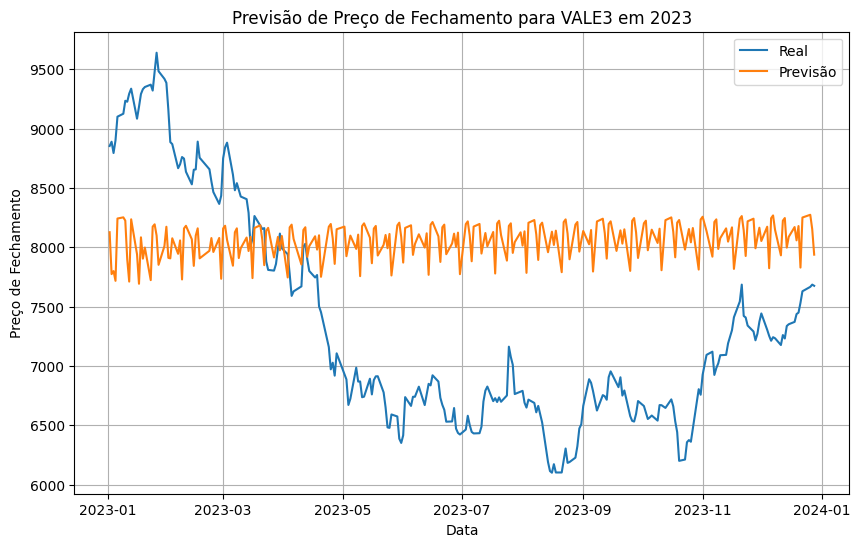

In [14]:
# Plotar os dados reais e as previsões
plt.figure(figsize=(10, 6))
plt.plot(vale3_df_2023['Data'], vale3_df_2023['Preco_Fechamento'], label='Real')
plt.plot(vale3_df_2023['Data'], predictions_2023, label='Previsão')
plt.title('Previsão de Preço de Fechamento para VALE3 em 2023')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\savio\AppData\Local\Temp\ipykernel_8996\1721155844.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_2024_index = pd.date_range(start='2024-01-01', periods=forecast_horizon, freq='M')
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\savio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

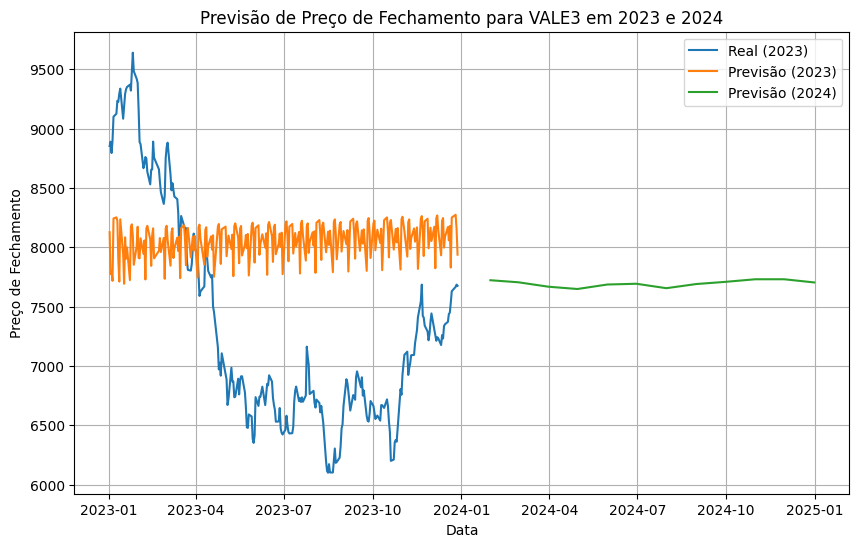

In [15]:
# Estender o modelo SARIMA para prever os dados de 2024
# O período de previsão será de 12 meses (de janeiro a dezembro)
forecast_horizon = 12
forecast_2024_index = pd.date_range(start='2024-01-01', periods=forecast_horizon, freq='M')

# Fazer previsões para 2024
forecast_2024 = fit_sarima_and_predict(vale3_df_2023, pd.DataFrame(index=forecast_2024_index), order, seasonal_order)

# Plotar os dados reais, previsões de 2023 e previsões de 2024
plt.figure(figsize=(10, 6))
plt.plot(vale3_df_2023['Data'], vale3_df_2023['Preco_Fechamento'], label='Real (2023)')
plt.plot(vale3_df_2023['Data'], predictions_2023, label='Previsão (2023)')
plt.plot(forecast_2024_index, forecast_2024, label='Previsão (2024)')
plt.title('Previsão de Preço de Fechamento para VALE3 em 2023 e 2024')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.grid(True)
plt.show()
